스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1986/10000
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.1363 - val_loss: 0.0022 - val_accuracy: 0.1515
Epoch 1987/10000
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.1189 - val_loss: 0.0022 - val_accuracy: 0.1616
Epoch 1988/10000
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.1247 - val_loss: 0.0022 - val_accuracy: 0.1414
Epoch 1989/10000
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.1315 - val_loss: 0.0022 - val_accuracy: 0.1515
Epoch 1990/10000
98/98 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.1288 - val_loss: 0.0022 - val_accuracy: 0.1616
Epoch 1991/10000
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.1248 - val_loss: 0.0022 - val_accuracy: 0.1414
Epoch 1992/10000
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - a

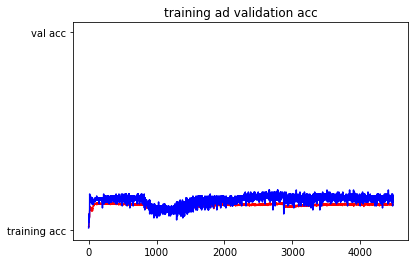

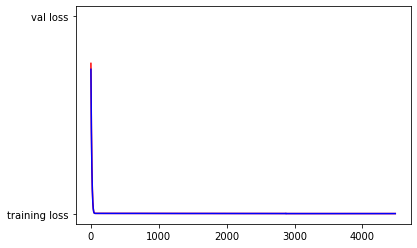

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

##pre-processing data##
p_url ='/content/combined_p_csv.csv'
p_dataset = pd.read_csv(p_url)
p_dataset = p_dataset.T
p_dataset = p_dataset.iloc[:,:100]
p_dataset = preprocessing.normalize(p_dataset)
print(p_dataset.shape)  #(5000,100)

#spliting dataset to train/test
from sklearn.model_selection import train_test_split
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(p_dataset, p_dataset, test_size = 0.01, random_state = 0)

#shape feature data
#s_dataset = pd.read_csv('/home/junyoung/PycharmProjects/stsel/encoder_decoder/DesignVariables_Test.csv')
#s_dataset = np.asarray(s_dataset,dtype=float)
#s_dataset = np.expand_dims(s_dataset,axis=2)
#print(s_dataset.shape)  #(5000,110,1)

####HYPER_PARAMETERS####
lr=5e-5
PATIENCE=200
EPOCHS=10000
BATCH_SIZE=50
VALIDATION_SPLIT=0.02
optimizer = tf.keras.optimizers.Adam(lr)
########################



early_stopping = tf.keras.callbacks.EarlyStopping(patience=PATIENCE)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

p_inputs = Input(shape=(100),name='p_inputs')
#s_inputs = Input(shape=(6,1),name='s_inputs')

#inputs = Concatenate()([p_inputs,s_inputs])

# 100-64-32-16-32-64-100
m1 = Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(p_inputs)
m1 = Dense(32,activation='relu')(m1)
m1 = Dense(16,activation='relu')(m1)
#m1 = Dense(10,activation='relu')(m1)
#m1 = Dense(16,activation='relu')(m1)
m1 = Dense(32,activation='relu')(m1)
m1 = Dense(64,activation='relu')(m1)

outputs = Dense(100,activation='relu')(m1)

#model1 = Model(inputs=[p_inputs,s_inputs],outputs=outputs)

model1 = Model(inputs=p_inputs,outputs=outputs)
model1.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
model1.summary()

#history1 = model1.fit({'p_inputs':X_p_train,'s_inputs':X_s_train},X_p_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT,
#                    callbacks=[early_stopping,lr_schedule])

history1 = model1.fit(X_p_train,X_p_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=VALIDATION_SPLIT,
                   callbacks=[early_stopping])


acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'r',"training acc")
plt.plot(epochs,val_acc,'b',"val acc")
plt.title('training ad validation acc')
plt.figure()

plt.plot(epochs,loss,'r',"training loss")
plt.plot(epochs,val_loss,'b',"val loss")

In [3]:
pr = tf.expand_dims(X_p_train[0,:],0)
model1.predict(pr)

array([[0.04952373, 0.04860946, 0.        , 0.        , 0.        ,
        0.04806339, 0.04835903, 0.04870128, 0.04890407, 0.04885204,
        0.04868182, 0.04869027, 0.        , 0.04858437, 0.        ,
        0.        , 0.04833943, 0.04843535, 0.04864866, 0.04879944,
        0.04893589, 0.04908866, 0.04917537, 0.04938103, 0.        ,
        0.        , 0.        , 0.04932441, 0.04942887, 0.04940541,
        0.04949974, 0.04930494, 0.04933736, 0.04936107, 0.        ,
        0.04931522, 0.04930986, 0.04921532, 0.04935577, 0.        ,
        0.04987714, 0.05020542, 0.05051889, 0.05079918, 0.0512899 ,
        0.05199602, 0.05280038, 0.0535969 , 0.05469879, 0.        ,
        0.05733781, 0.05908648, 0.0607056 , 0.06275459, 0.06525908,
        0.06799717, 0.07087618, 0.        , 0.07756359, 0.08148889,
        0.08541889, 0.08941209, 0.        , 0.0968927 , 0.10085654,
        0.10413782, 0.10744388, 0.1104159 , 0.11300373, 0.11471694,
        0.11609869, 0.        , 0.11767953, 0.11

In [4]:
pr

<tf.Tensor: shape=(1, 100), dtype=float64, numpy=
array([[0.05226438, 0.05226559, 0.05226559, 0.05226559, 0.05227027,
        0.05227027, 0.0522769 , 0.0522769 , 0.05228705, 0.05229915,
        0.05231278, 0.05232946, 0.05234763, 0.0523686 , 0.05239136,
        0.0524164 , 0.0524434 , 0.05247244, 0.05250338, 0.05253619,
        0.05257085, 0.05260741, 0.052646  , 0.05268682, 0.0527301 ,
        0.05277603, 0.05282471, 0.05287607, 0.05292981, 0.05298552,
        0.05304277, 0.0531013 , 0.05316123, 0.05322309, 0.05328776,
        0.05335623, 0.05342931, 0.05350736, 0.05359022, 0.05367735,
        0.05376799, 0.05386157, 0.05395783, 0.05405687, 0.05415902,
        0.05426456, 0.05437334, 0.05448479, 0.0545986 , 0.05471447,
        0.05483476, 0.05495122, 0.05505833, 0.05523654, 0.05607404,
        0.05927509, 0.06760641, 0.08348478, 0.09997244, 0.1079767 ,
        0.11093751, 0.11068009, 0.11116157, 0.11077531, 0.11142251,
        0.11178749, 0.11227772, 0.11258405, 0.11303256, 0.11350166

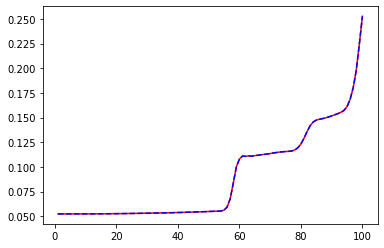

In [6]:
import matplotlib.pyplot as plt
x_axis = list(range(1,101))
pr = np.reshape(pr,(100,))
plt.plot(x_axis,pr,'r-')
plt.plot(x_axis,X_p_train[0,:],'b--')

In [7]:
pr_list = []

for i in range(10):
  pr = tf.expand_dims(X_p_test[i,:],0)
  model1.predict(pr)
  pr_list.append(pr)

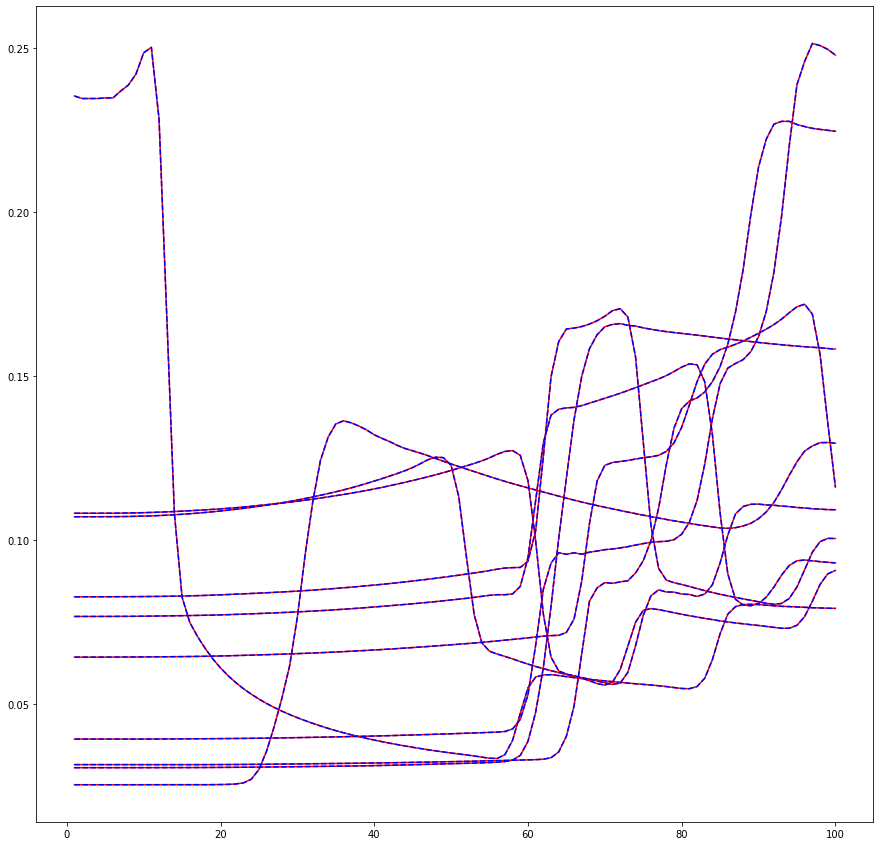

In [8]:
plt.figure(figsize=(15, 15))
for i in range(10):
  plt.plot(x_axis,np.reshape(pr_list[i],(100,)),'r-')
  plt.plot(x_axis,X_p_test[i,:],'b--')

In [ ]:
#model1.save('model1.h5')

In [9]:
p_inputs_tmp = Input(shape=(100),name='p_inputs_tmp')
m1_tmp = Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(p_inputs_tmp)
m1_tmp = Dense(32,activation='relu')(m1_tmp)
outputs_tmp = Dense(16,activation='relu',name='16_feature')(m1_tmp)
encoder = Model(inputs=p_inputs_tmp,outputs=outputs_tmp)
encoder.layers[0].set_weights(model1.layers[0].get_weights())
encoder.layers[1].set_weights(model1.layers[1].get_weights())
encoder.layers[2].set_weights(model1.layers[2].get_weights())
encoder.layers[3].set_weights(model1.layers[3].get_weights())
encoder.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
encoded_output = encoder.predict(p_dataset)

In [10]:
encoded_output.shape

(5000, 16)

In [11]:
p_inputs_tmp2 = Input(shape=(16),name='p_inputs_tmp2')
m1_tmp2 = Dense(32,activation='relu')(p_inputs_tmp2)
m1_tmp2 = Dense(64,activation='relu')(m1_tmp2)
outputs_tmp2 = Dense(100,activation='relu')(m1_tmp2)
decoder = Model(inputs=p_inputs_tmp2,outputs=outputs_tmp2)
decoder.layers[1].set_weights(model1.layers[4].get_weights())
decoder.layers[2].set_weights(model1.layers[5].get_weights())
decoder.layers[3].set_weights(model1.layers[6].get_weights())
decoder.compile(loss=tf.keras.losses.MSE,optimizer=optimizer,metrics=['accuracy'])
decoder.summary()
decoded_output = decoder.predict(encoded_output)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
p_inputs_tmp2 (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               6500      
Total params: 9,156
Trainable params: 9,156
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(decoded_output)
print(model1.predict(p_dataset))
print('matches perfectly! encoder and decoder worked!')

[[0.10673045 0.10752276 0.         ... 0.10619557 0.1064768  0.1069986 ]
 [0.07053198 0.07034807 0.         ... 0.11669859 0.1158924  0.11559752]
 [0.10551663 0.10513488 0.         ... 0.13752523 0.13927324 0.14095056]
 ...
 [0.0460446  0.04553553 0.         ... 0.17433353 0.1744486  0.17465958]
 [0.0561881  0.05573028 0.         ... 0.18523386 0.18678187 0.18802436]
 [0.10591696 0.10562602 0.         ... 0.13788968 0.14017689 0.14236957]]
[[0.10673045 0.10752276 0.         ... 0.10619557 0.1064768  0.1069986 ]
 [0.07053198 0.07034807 0.         ... 0.11669859 0.1158924  0.11559752]
 [0.10551663 0.10513488 0.         ... 0.13752523 0.13927324 0.14095056]
 ...
 [0.0460446  0.04553553 0.         ... 0.17433353 0.1744486  0.17465958]
 [0.0561881  0.05573028 0.         ... 0.18523386 0.18678187 0.18802436]
 [0.10591696 0.10562602 0.         ... 0.13788968 0.14017689 0.14236957]]
matches perfectly! encoder and decoder worked!
